# Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Непреры́вное равноме́рное распределе́ние — в теории вероятностей — распределение случайной вещественной величины, принимающей значения, принадлежащие интервалу [a, b], характеризующееся тем, что плотность вероятности на этом интервале постоянна.

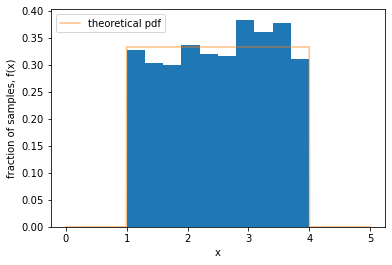

In [22]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

sample = uniform_rv.rvs(1000)

# Гистограмма выборки:
plt.hist(sample, density=True)# Построение графика

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0, 5, 1000) # Массив значений аргумента
pdf = uniform_rv.pdf(x) # функция равномерного распределен
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5) # Построение графика
plt.legend() # Показать легенду
plt.ylabel('fraction of samples, f(x)') # Метка по оси y
plt.xlabel('x') # Метка по оси x
plt.show() # Показать график

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).


n=5:


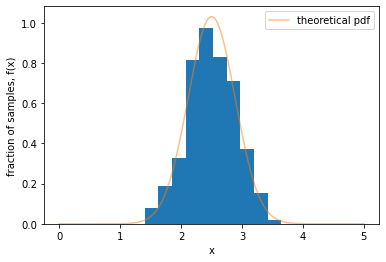

n=10:


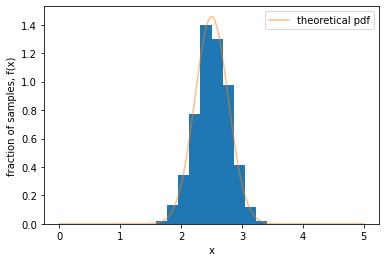

n=50:


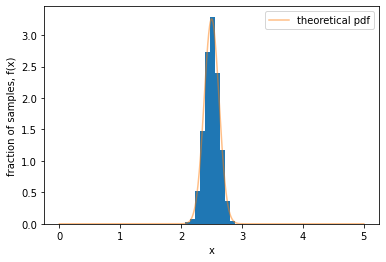

In [25]:
grid_sizes = [5, 10, 50]
for size in grid_sizes:
    print ('n=%d:' % size)
    # Гистограмма выборки:
    sample = [np.mean(uniform_rv.rvs(size=size)) for _ in range(1000)]
    plt.hist(sample, density=True) # Построение графика
    # на том же графике построим теоретическую плотность распределения:
    mu = (a + b) / 2.0
    sigma = np.sqrt(((b-a)**2 / 12.0) / size)    
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 5, 1000) # Массив значений аргумента
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5) # Построение графика
    plt.legend() # Показать легенду
    plt.ylabel('fraction of samples, f(x)') # Метка по оси y
    plt.xlabel('x') # Метка по оси x
    plt.show() # Показать график

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Как видно из полученных выше графиков, распределение хорошо описывается нормальным распределением, что подтверждает утверждение центральной предельной теоремы. Точность аппроксимации увеличивается с ростом n.